In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading our dataset
df = pd.read_csv('Cardiotocographic.csv')

#overview of column names and data type overview
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


Lets check for the missing values in our dataset first

In [ ]:
df.info()
#we have multiple columns with null values
#and good thing all our columns are in same datatype since these are all readings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


Now we will check the skewness and distributions of columns
if data is skewed we will impute values with median 
else if normally distributed then with mean

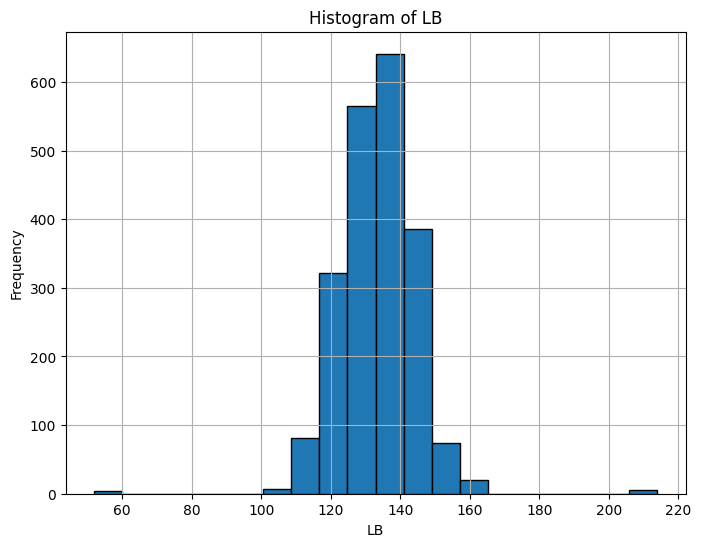

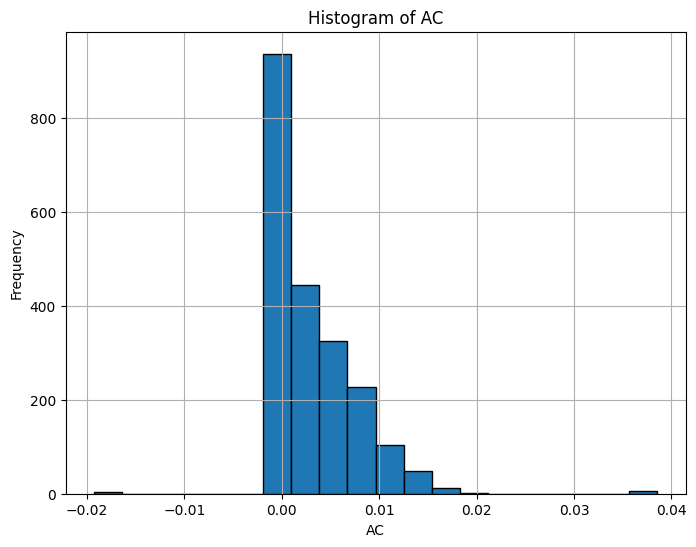

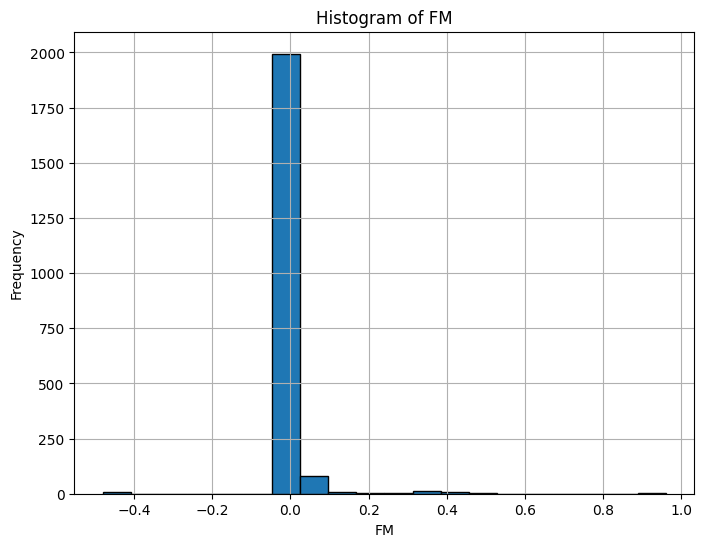

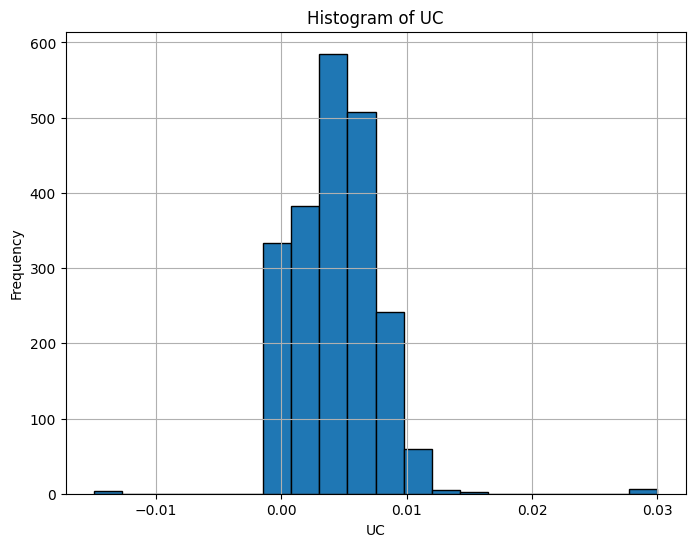

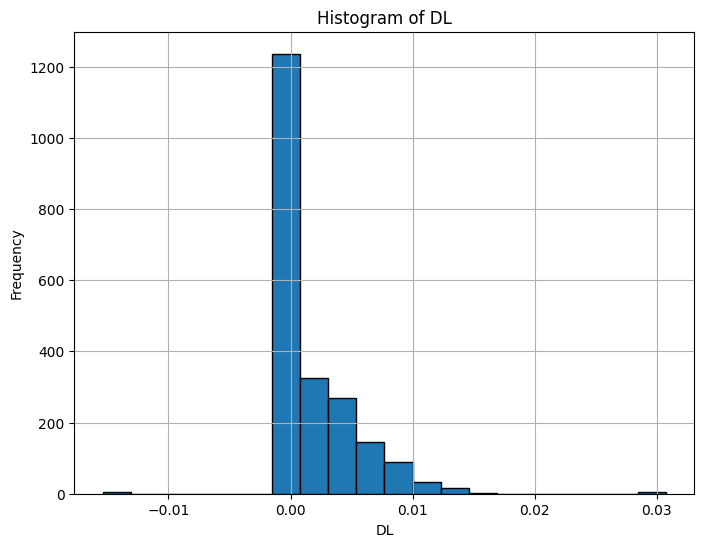

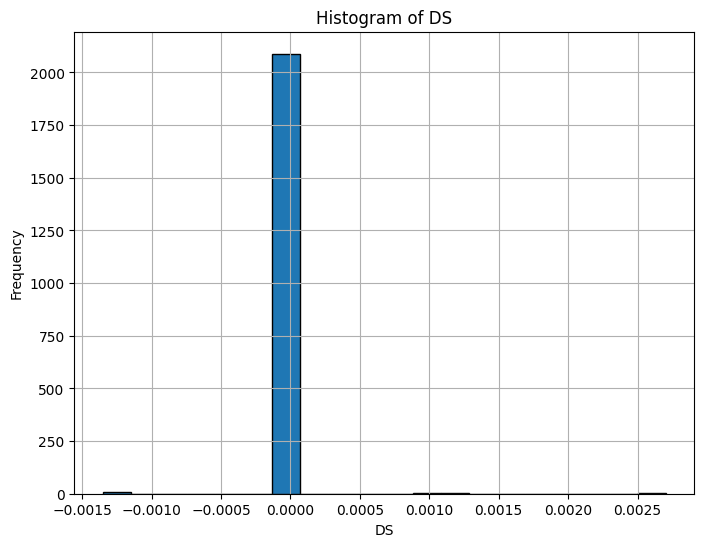

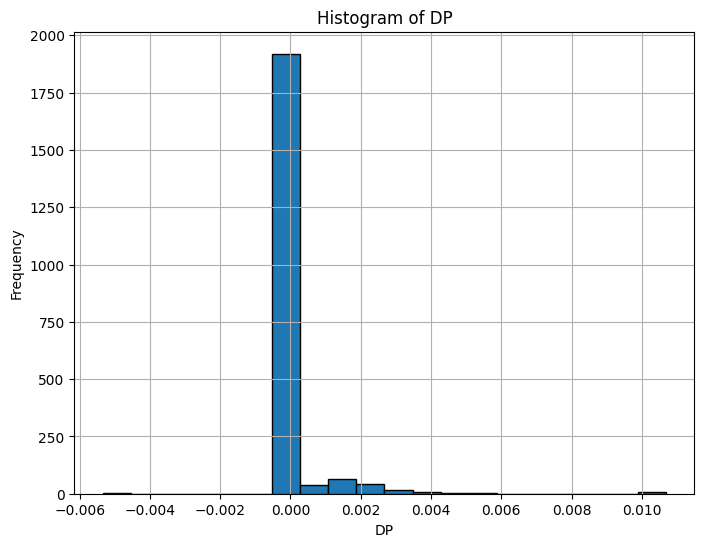

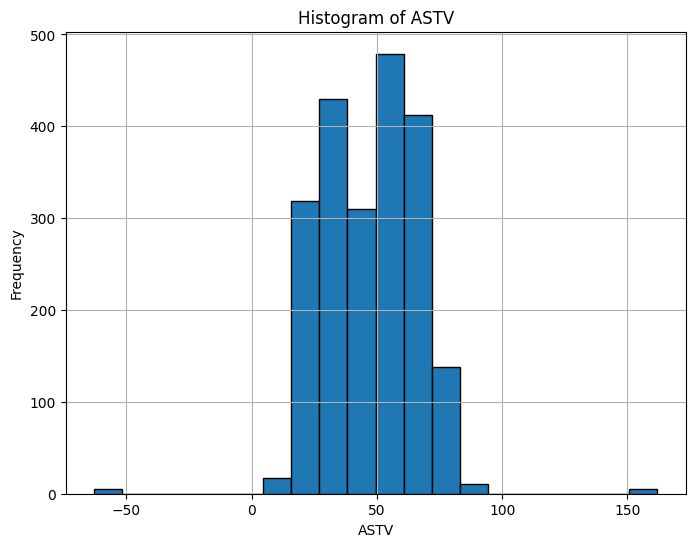

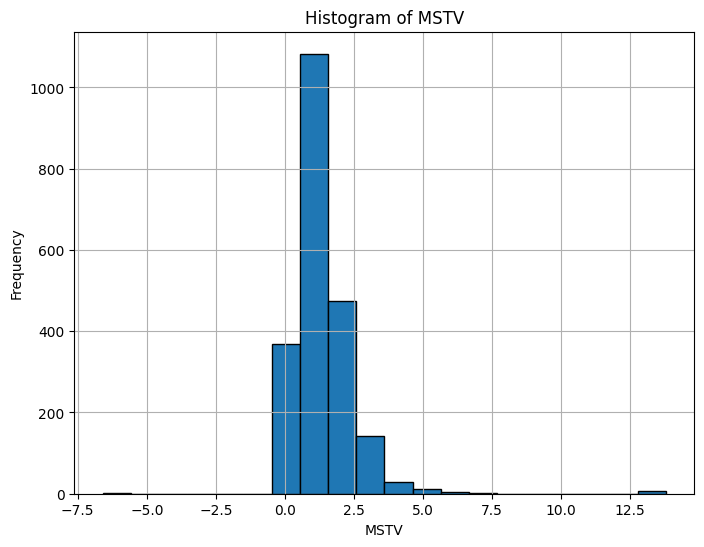

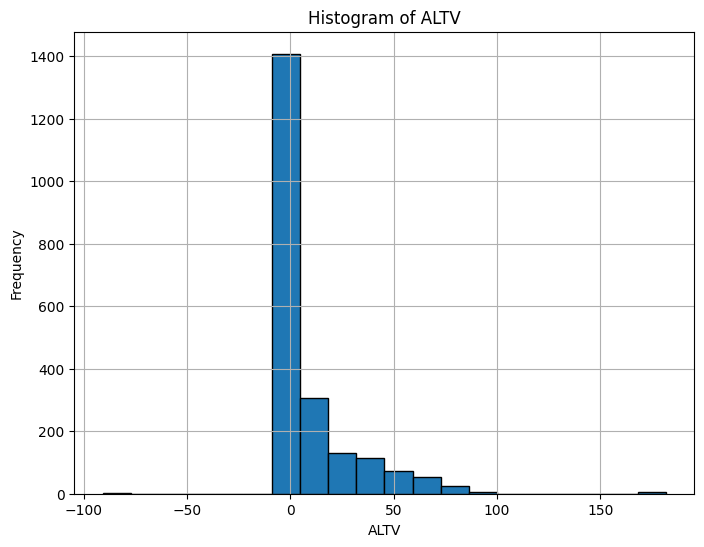

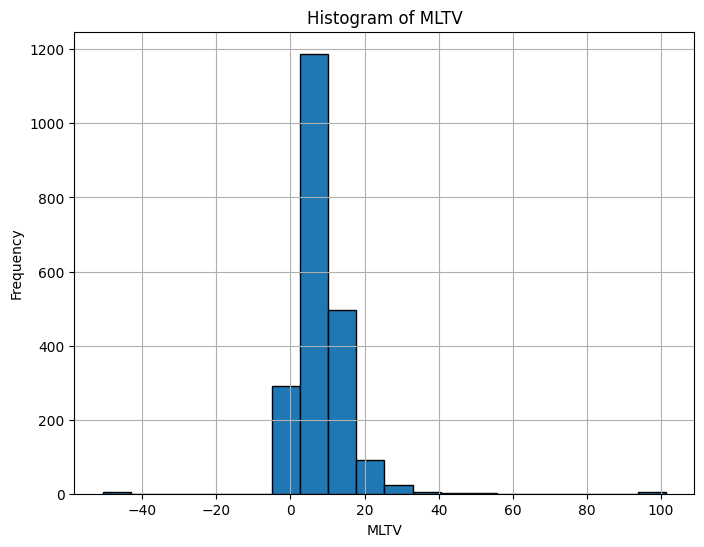

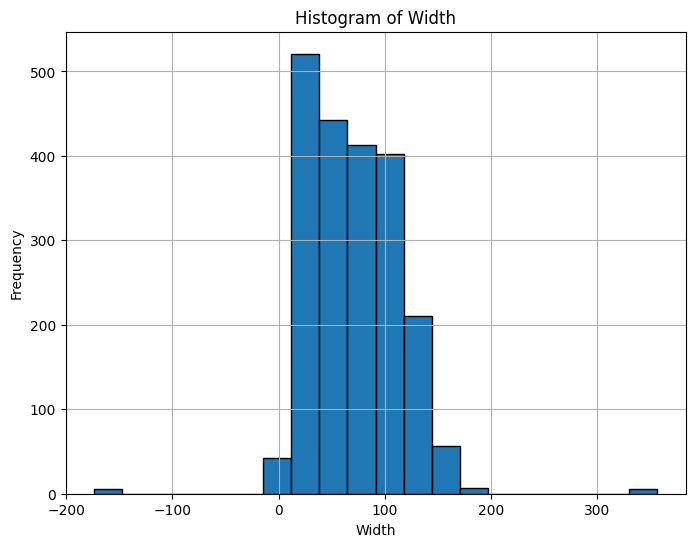

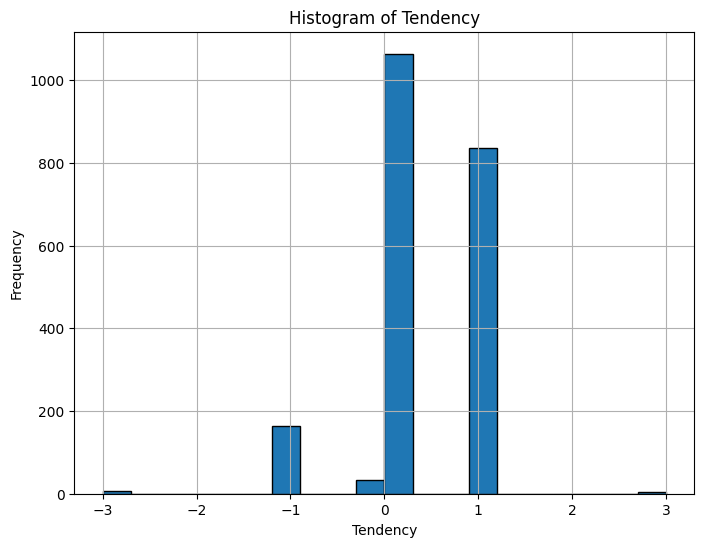

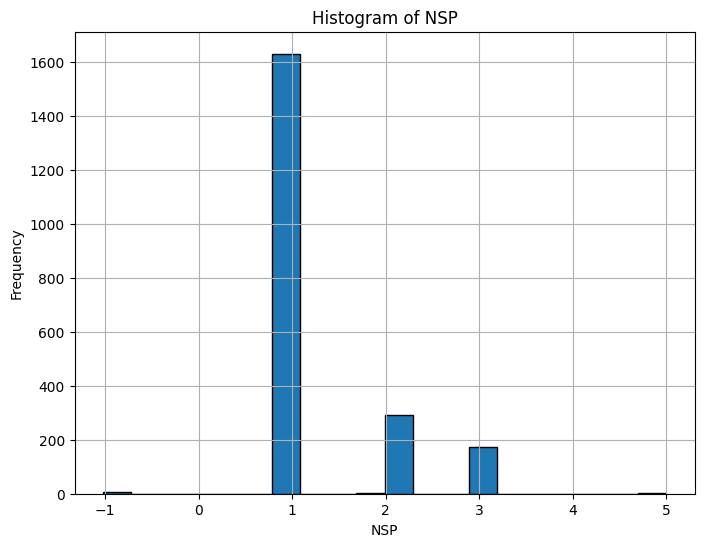

In [9]:
#impute these missing values with median 
cols = df.columns
def plot_hist(cols):
    for col in cols:
        plt.figure(figsize=(8, 6))  # Create a new figure for each histogram
        plt.hist(df[col], bins=20, edgecolor='black')  # Adjust bins as needed
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

plot_hist(cols)

In [ ]:
# since most of the columns were skewed we will fill null values with median 

for col in df:
    median = df[col].median()
    df[col] = df[col].fillna(median)

df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [ ]:
#cross checking if all the null values are imputed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


Now we will check for outliers in our dataset by using boxplot

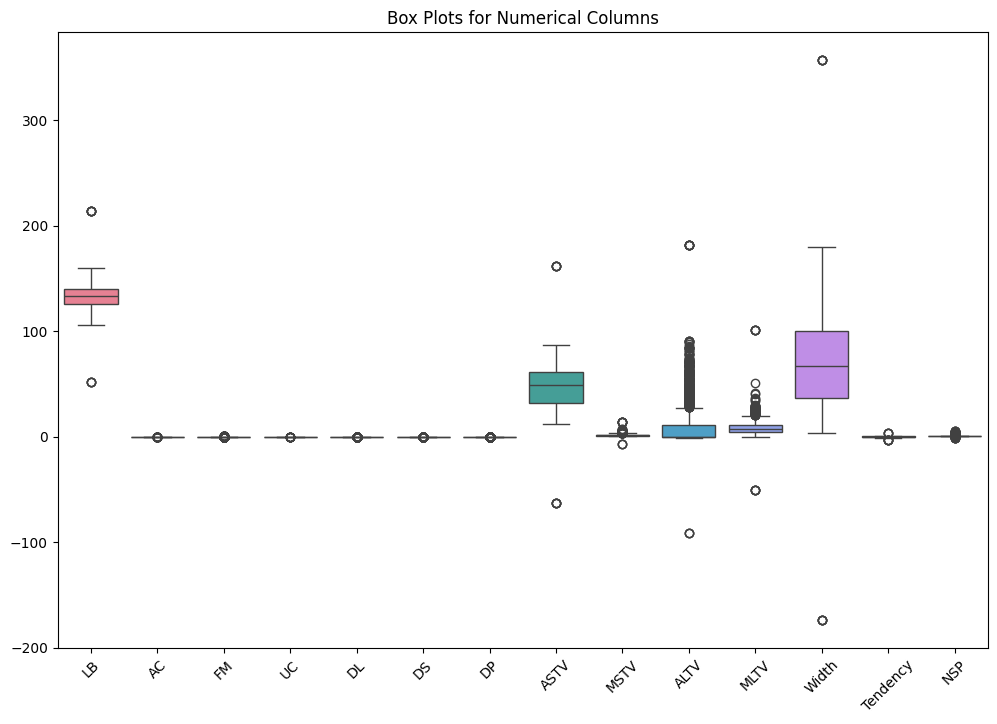

In [21]:
def plot_boxplots_for_columns(df, columns=None):
  """
  Plots box plots for specified columns in a DataFrame.

  Args:
    df: The DataFrame containing the data.
    columns: A list of column names to plot. If None, plots for all numerical columns.

  Returns:
    None
  """

  if columns is None:
    columns = df.select_dtypes(include='number').columns

  plt.figure(figsize=(12, 8))
  sns.boxplot(data=df[columns])
  plt.title('Box Plots for Numerical Columns')
  plt.xticks(rotation=45)
  plt.show()

plot_boxplots_for_columns(df)


'LB','ASTV', 'ALTV', 'MLTV', 'Width' these are the columns with outliers

In [34]:
outlier_cols = df[['LB','ASTV', 'ALTV', 'MLTV', 'Width']]
outlier_cols

,LB,ASTV,ALTV,MLTV,Width
0,120.000000,73.0,43.000000,2.4,64.0
1,132.000000,17.0,0.000000,10.4,130.0
2,133.000000,16.0,0.000000,13.4,130.0
3,134.000000,16.0,0.000000,23.0,117.0
4,131.948232,16.0,0.000000,19.9,117.0
...,...,...,...,...,...
2121,140.000000,79.0,25.000000,7.2,40.0
2122,140.000000,78.0,22.000000,7.1,66.0
2123,140.000000,79.0,20.000000,6.1,67.0
2124,140.000000,78.0,27.000000,7.0,66.0


To remove these outliers we will use z_score with threshold value 3 so that any z_score of a value above 3 will be removed.

In [ ]:
z_scores = (df - df.mean()) / df.std()
threshold = 3
df_filtered = df[(z_scores.abs() < threshold).all(axis=1)]

now we will standardize the whole df

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit and transform the data
df_scaled = scaler.fit_transform(df_filtered)
df_scaled = pd.DataFrame(data=df_scaled, columns=df.columns)


In [66]:

df_scaled

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,-1.344187,-0.843029,-0.312876,-1.512206,-0.640367,-0.020268,-0.247601,1.552531,-1.006791,2.040159,-1.132903,-0.130192,1.115170,1.433106
1,-0.131702,0.849464,-0.312876,0.684860,0.538966,-0.020268,-0.247601,-1.774856,1.050053,-0.554841,0.397955,1.624934,-0.546962,-0.457191
2,-0.030662,0.038361,-0.312876,1.348177,0.587942,-0.020268,-0.247601,-1.834274,1.050053,-0.554841,0.972026,1.624934,-0.546962,-0.457191
3,0.070378,-0.163648,-0.312876,1.154020,0.306421,-0.020268,-0.247601,-1.834274,1.435711,-0.554841,2.809055,1.279227,1.115293,-0.457191
4,-0.136933,0.885299,-0.312876,1.292273,-0.640367,-0.020268,-0.247601,-1.834274,1.435711,-0.554841,2.215848,1.279227,1.115293,-0.457191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,0.676621,-0.843029,-0.312876,0.201177,-0.180515,-0.020268,-0.247601,1.790202,-0.749685,0.471089,-0.444017,-1.007755,-0.546962,-0.457191
1865,0.676621,-0.637531,-0.312876,0.891376,-0.640367,-0.020268,-0.247601,1.849619,-1.135343,0.772834,-0.233524,-0.077006,1.115293,1.433106
1866,0.676621,-0.582933,-0.312876,0.851255,-0.640367,-0.020268,-0.247601,1.909037,-1.135343,0.652136,-0.424881,-0.050413,1.115293,1.415080
1867,0.676621,-0.662922,-0.312876,0.592010,-0.640367,-0.020268,-0.247601,1.849619,-1.135343,1.074578,-0.252660,-0.077006,1.115293,1.433106


Lets use heatmap for correlation

<Axes: >

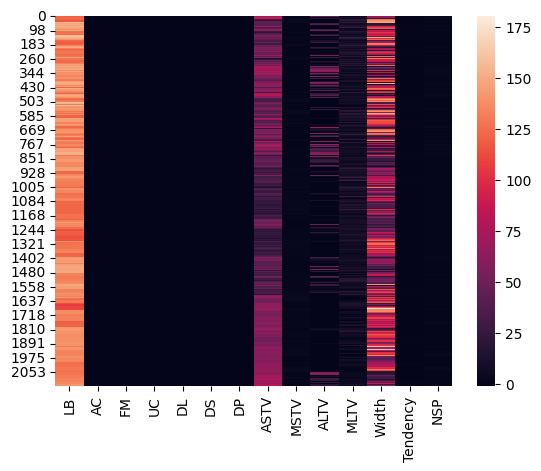

In [67]:
sns.heatmap(df_filtered)

In [70]:
correlation_matrix = df_scaled.corr()
correlation_matrix

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.086312,-0.042002,-0.160908,-0.142871,0.030139,-0.129500,0.317181,-0.310611,0.303813,-0.050759,-0.145604,0.294022,0.195804
AC,-0.086312,1.000000,0.169882,0.080253,-0.097710,0.011409,-0.125388,-0.275032,0.230540,-0.388339,-0.166596,0.315509,0.017183,-0.353284
FM,-0.042002,0.169882,1.000000,-0.158045,0.002855,-0.004361,-0.014959,-0.041502,0.206354,-0.062675,0.033133,0.196127,0.058276,-0.033025
UC,-0.160908,0.080253,-0.158045,1.000000,0.276618,0.028794,0.176754,-0.203468,0.279822,-0.285765,-0.079793,0.118664,-0.096879,-0.192707
DL,-0.142871,-0.097710,0.002855,0.276618,1.000000,-0.010142,0.309995,-0.108810,0.563550,-0.271666,-0.213164,0.517035,0.069325,0.014724
DS,0.030139,0.011409,-0.004361,0.028794,-0.010142,1.000000,0.013134,0.026784,-0.013095,-0.015220,-0.009659,-0.014026,-0.017802,0.019197
DP,-0.129500,-0.125388,-0.014959,0.176754,0.309995,0.013134,1.000000,0.065157,0.288284,-0.128402,-0.224789,0.257692,-0.146964,0.435234
ASTV,0.317181,-0.275032,-0.041502,-0.203468,-0.108810,0.026784,0.065157,1.000000,-0.420823,0.436725,-0.321977,-0.225102,0.002120,0.470302
MSTV,-0.310611,0.230540,0.206354,0.279822,0.563550,-0.013095,0.288284,-0.420823,1.000000,-0.488712,0.060924,0.642500,-0.034868,-0.146742
ALTV,0.303813,-0.388339,-0.062675,-0.285765,-0.271666,-0.015220,-0.128402,0.436725,-0.488712,1.000000,-0.164314,-0.418515,0.034480,0.415827


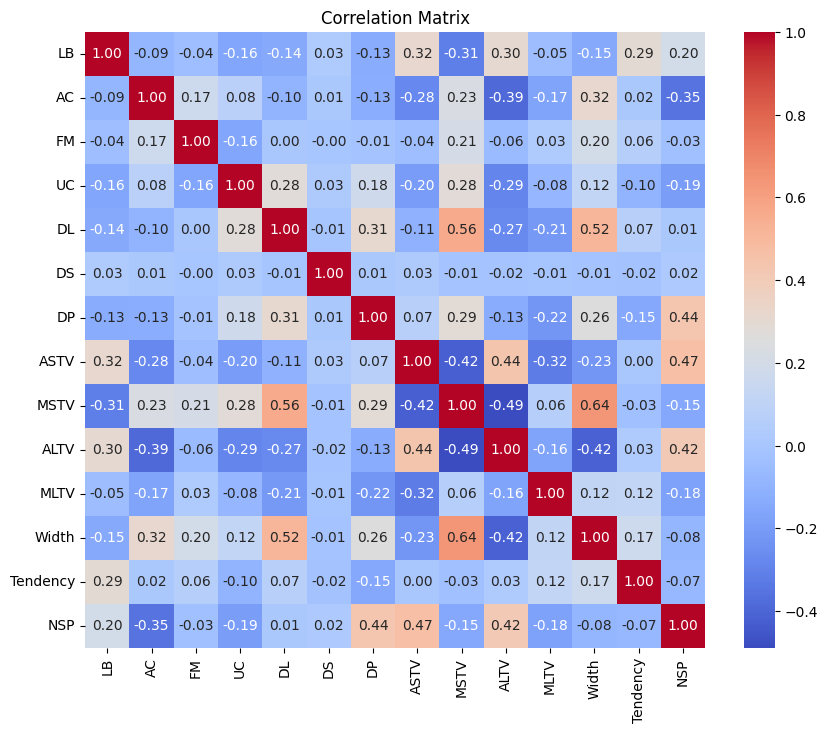

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# from above heatmap we can say there's not much correlation between our columns